# Loda data

In [60]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [61]:
cn = pd.read_csv("./data/concentration/2020_20230814.csv")

c:\Users\user\Anaconda3\envs\sim_search\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



In [68]:
df_6576 = cn[cn['股號']==6576].reset_index(drop=True)
fig = px.bar(df_6576, x='日期', y="主力買賣超", width=1500, height=500)
fig.show()
# plt.plot([i for i in range(len(df_6576['日期']))], df_6576['主力買賣超'])

In [67]:
np.where(predictions_if == -1)

(array([  0,  34,  52,  56,  62,  79, 111, 117, 128, 129, 130, 131, 149,
        172, 174, 175, 176, 180, 181, 233, 249, 270, 315, 319, 333, 338,
        339, 340, 343, 346, 348, 349, 383, 385, 388, 390, 391, 392, 396,
        397, 400, 404, 417, 425, 490, 497, 517, 526, 532, 533, 534, 535,
        536, 540, 558, 560, 569, 570, 593, 603, 605, 607, 608, 609, 612,
        613, 614, 615, 616, 617, 618, 619, 622, 641, 673, 694, 699, 719,
        723, 734, 740, 743, 760, 776, 777, 778, 779, 783, 790, 791, 794,
        799, 810, 831, 832, 834, 835, 836, 839, 840, 843, 844, 847, 849,
        850, 858, 860, 869, 870], dtype=int64),)

# Isolation Forest

In [69]:
import numpy as np
from sklearn.ensemble import IsolationForest


data = df_6576['主力買賣超'].to_numpy().reshape(-1,1)
# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.1)  # Adjust contamination based on your data
clf.fit(data[:400])

# Predict outliers (1 for inliers, -1 for outliers)
predictions_if = clf.predict(data)

# Plot the results
# plt.figure(figsize=(20, 6))
fig = go.Figure()

# Plot inliers
fig.add_trace(

    go.Scatter(
        x = df_6576['日期'].iloc[np.where(predictions_if == -1)],
        y = df_6576['主力買賣超'].iloc[np.where(predictions_if == -1)],
        mode = 'markers',
        name = 'ISO',
        marker_color = 'red'
        )   

)

fig.add_trace(

    go.Bar(
        x = df_6576['日期'],
        y = df_6576['主力買賣超'],
        name = 'TS',
        marker_color = 'blue'
    )
)


fig.show()

In [64]:
df_6576['主力買賣超'].iloc[np.where(predictions == -1)]

34    -196
52    -507
56    -419
62    -226
79     232
      ... 
849   -291
850   -198
858   -801
869   -340
870   -230
Name: 主力買賣超, Length: 104, dtype: int64

In [65]:
df_6576['日期'].iloc[np.where(predictions == -1)]

34     2023-05-26
52     2022-09-26
56     2022-01-03
62     2022-01-11
79     2022-05-06
          ...    
849    2021-03-26
850    2021-03-29
858    2021-04-13
869    2021-04-28
870    2021-04-29
Name: 日期, Length: 104, dtype: object

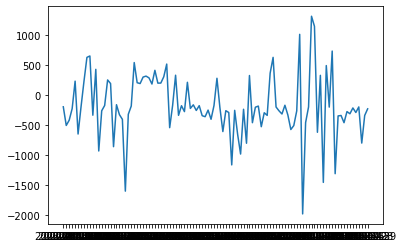

In [66]:
import matplotlib.pyplot as plt 
plt.plot(df_6576['日期'].iloc[np.where(predictions == -1)], df_6576['主力買賣超'].iloc[np.where(predictions == -1)])